<a href="https://colab.research.google.com/github/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023/blob/main/clustering/Ising_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means clustering

Now we make use of the data of $40\times 40$ system. Since it contain lots of spins, we only use 5000 sample here. 

In [27]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt 
!git clone https://github.com/LeoisWTT/PHYS3151-Machine-Learning-in-Physics-2023
# spin configurations
df3 = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2023/clustering/Ising_clustering_conf.csv",header=None) 
# temperature
df4 = pd.read_csv("/content/PHYS3151-Machine-Learning-in-Physics-2023/clustering/Ising_clustering_temp.csv",header=None)
df3 = df3.to_numpy()
df4 = df4.to_numpy()
pc = df3
tc = df4
tc = tc.T
print(pc)
print(pc.shape)
print(tc.shape)

fatal: destination path 'PHYS3151-Machine-Learning-in-Physics-2023' already exists and is not an empty directory.
[[-7.74909122e-01  1.27143544e+00]
 [ 6.55223643e-01 -8.72356330e-01]
 [ 2.01012902e+01 -2.39105217e-02]
 ...
 [-1.97735808e+01  9.96617100e-04]
 [-1.98982500e+01 -4.48367571e-02]
 [ 4.79632658e-01 -7.53841224e-01]]
(5000, 2)
(1, 5000)


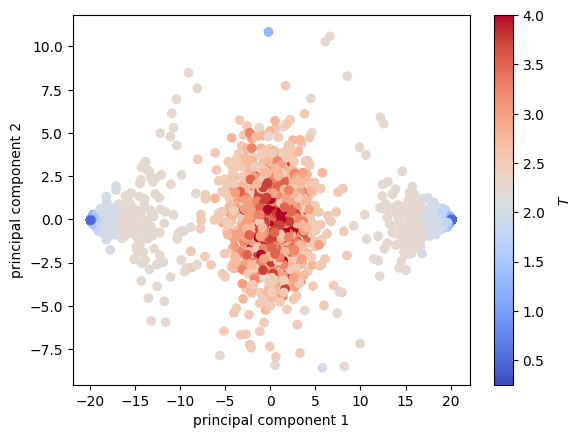

In [28]:
plt.scatter(pc[:,0],pc[:,1],c=tc,cmap="coolwarm") 
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
cb = plt.colorbar()
cb.set_label(label='$T$',labelpad=10)
plt.show()

## K-means

Obviously, these data can be split into 3 clusters. Let's do K-means method step by step.

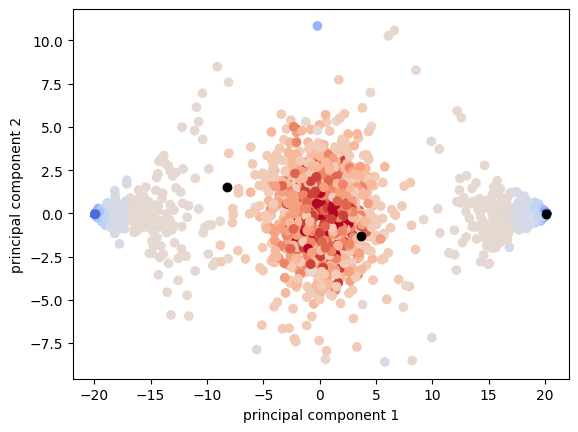

In [29]:
import random
K=3
a = random.sample(range(0, len(pc)-1), K)
Centroids = np.zeros((K,2))
#print(a)
for i in range(K):
  Centroids[i,0] = pc[a[i],0]
  Centroids[i,1] = pc[a[i],1]
plt.scatter(pc[:,0],pc[:,1],c=tc,cmap="coolwarm")
plt.scatter(Centroids[:,0],Centroids[:,1],c='black')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

In [30]:
pc = pc.tolist()
Centroids = Centroids.tolist()
principalComponents = pd.DataFrame(pc)
Centroids = pd.DataFrame(Centroids)
print(principalComponents)
print(Centroids)

              0         1
0     -0.774909  1.271435
1      0.655224 -0.872356
2     20.101290 -0.023911
3    -19.898250 -0.044837
4    -19.898250 -0.044837
...         ...       ...
4995 -19.898250 -0.044837
4996   1.052938 -0.329986
4997 -19.773581  0.000997
4998 -19.898250 -0.044837
4999   0.479633 -0.753841

[5000 rows x 2 columns]
           0         1
0   3.646155 -1.328774
1  20.101290 -0.023911
2  -8.250301  1.501410


In [31]:
def K_mean(pc,K=3,jmax=10):
# step 1 - choose 3 clusters at random
# step 2 - select random point as centroids
    a = random.sample(range(0, len(pc)-1), K)
    Centroids = np.zeros((K,2))
    #print(a)
    for i in range(K):
      Centroids[i,0] = pc[a[i]][0]
      Centroids[i,1] = pc[a[i]][1]
    diff = 1
    j = 0 
    Centroids = pd.DataFrame(Centroids)
    Centroids.columns = ['pc1','pc2']
    principalComponents = pd.DataFrame(pc)
    principalComponents.columns = ['pc1','pc2']
    while (diff!=0):
        XD = principalComponents
        i = 1
# step 3 - assign all the points to the closest cluster centroid
        for index1,row_c in Centroids.iterrows():
            ED = []
            for index2,row_d in XD.iterrows():
                d1 = (row_c["pc1"] - row_d["pc1"])**2
                d2 = (row_c["pc2"] - row_d["pc2"])**2
                d = np.sqrt(d1+d2)
                ED.append(d)
            principalComponents[i] = ED
            i = i + 1
            
        C=[]
        for index,row in principalComponents.iterrows():
            min_dist = row[1]
            pos = 1
            for i in range(K):
                if row[i+1] < min_dist:
                    min_dist = row[i+1]
                    pos = i + 1
            C.append(pos)
        principalComponents["Cluster"]=C
# step 4 - recomput centroids of newly formed clusters
        Centroids_new = principalComponents.groupby(["Cluster"]).mean()[["pc2","pc1"]]
# step 5 - repeat 3 and 4
        if j == 0:
            diff = 1
            j = j+1
        elif j<jmax:
            diff = ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum()
            print(diff.sum())
            j = j+1
        else:
          diff = ((Centroids_new['pc2'] - Centroids['pc2'])**2).sum() + ((Centroids_new['pc1'] - Centroids['pc1'])**2).sum()
          print('force exit with diff=', diff.sum())
          diff=0
        Centroids = principalComponents.groupby(["Cluster"]).mean()[["pc2","pc1"]]
    return principalComponents, Centroids

In [32]:
principalComponents, Centroids=K_mean(pc,3)

90.59892118613605
0.19577657156148878
7.126331862193632e-05
0.0


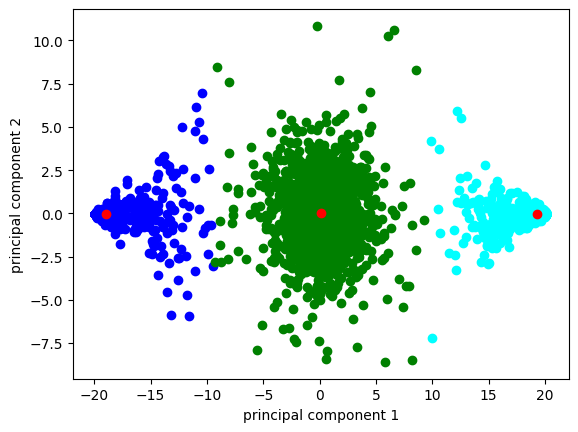

In [33]:
color=['blue','green','cyan']
for k in range(K):
    data=principalComponents[principalComponents["Cluster"]==k+1]
    plt.scatter(data["pc1"],data["pc2"],c=color[k])
plt.scatter(Centroids["pc1"],Centroids["pc2"],c='red')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

## Elbow Method

We can use Elbow Method to verify that.

<br>We want a measurement for the clustering and here we define the distortion(distortion cost function):
<br>
$$
J=\frac{1}{m}\sum_{i=1}^m||x^{(i)}-\mu_{c^{i}}||^2
$$
<br>Choosing the number of clusters is of great importance. Here we introduce Elbow method, which is to vary K and compute cost function at a range of K values. And while the cost_function decrease, we choose the elbow point in the plot as K. Note, it can happen that you don't get a a nice line -> no clear elbow on curve.

In [34]:
print(principalComponents)

            pc1       pc2          1          2          3  Cluster
0     -0.774909  1.271435  18.255800   1.508689  20.080506        2
1      0.655224 -0.872356  19.656509   1.071027  18.625936        2
2     20.101290 -0.023911  39.084907  19.991524   0.838854        3
3    -19.898250 -0.044837   0.914655  20.008373  39.160873        1
4    -19.898250 -0.044837   0.914655  20.008373  39.160873        1
...         ...       ...        ...        ...        ...      ...
4995 -19.898250 -0.044837   0.914655  20.008373  39.160873        1
4996   1.052938 -0.329986  20.038664   1.016508  18.211968        2
4997 -19.773581  0.000997   0.790981  19.883541  39.036227        1
4998 -19.898250 -0.044837   0.914655  20.008373  39.160873        1
4999   0.479633 -0.753841  19.476368   0.884293  18.796490        2

[5000 rows x 6 columns]


In [35]:
Kn=[]
distortions=[]
for i in range(2,7):
    Kn.append(i)
    principalComponents=K_mean(pc,i)[0]
    data=np.array(principalComponents)[:,2:2+i]
    data=np.min(data,axis=1)
    distortions.append(data.sum()/len(data))

0.03564631018303729
0.0008939662429240106
0.0
5.592186451941403
8.979619900051732
18.320629566881568
43.643478648191085
75.87444596545537
0.5717485099188572
0.00017633033537342685
0.0
1399.2203754020964
1.385906592380524
1.0408751490867676
0.17542302796304982
0.03001620242419642
0.01109599253890526
0.0015253409902019667
0.0
2.2399788448462417
1.5925720991762544
0.8877162138761663
0.11442644280918704
0.05778916016729251
0.017849853467813283
0.012890616321039775
0.009146528986310149
0.008884872526917682
force exit with diff= 0.008644524132891983
530.7682876830917
2.1872102974965264
1.3679884047455424
0.49546476499208164
0.1671076755779091
0.06983935512025319
0.050774150480931535
0.043177615035372076
0.011513150589550096
force exit with diff= 0.008686128419615458


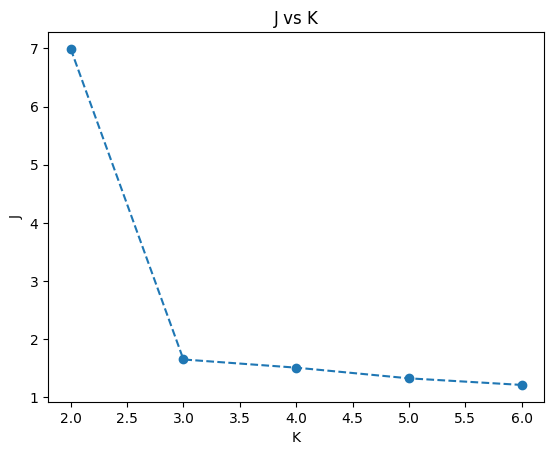

In [36]:
plt.plot(Kn,distortions,ls='--',marker='o')
plt.xlabel('K')
plt.ylabel('J')
plt.title('J vs K')
plt.show()

This result shows that the data should best be split into 3 clusters, which is much better than the case of 4 cluster, just as what we our figures ploted before this measure showed.

Finally, we apply the KMeans function from the sklearn package and then show the results in the figure below.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


centers are: [[ 19.26262276  -0.04158764]
 [  0.10990103   0.04944743]
 [-18.98361362  -0.03903064]]


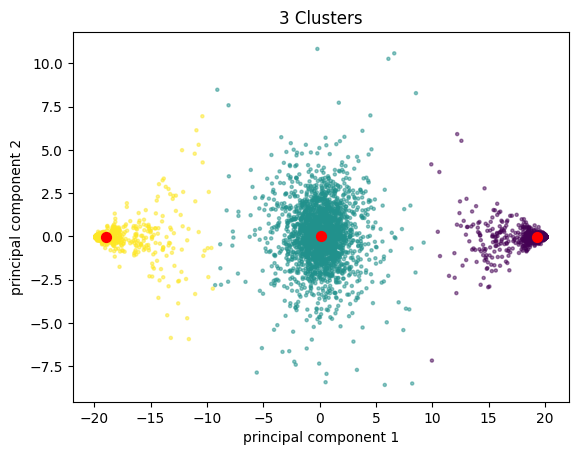

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(pc)
centroids = kmeans.cluster_centers_
print('centers are:',centroids)

fig= plt.figure()
x =np.array(pc)[:,0]
y =np.array(pc)[:,1]

plt.scatter(x, y, c= kmeans.labels_.astype(float),s=5, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=1)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.title('3 Clusters')

plt.show()